# Personal Project no. 1 - telecom customer churn

## Notebook 1 - Data cleaning and EDA

In this project, I will create predictive models to estimate whether a customer for a telecom company will turn over or churn. The data comes from an old Kaggle competition: https://www.kaggle.com/blastchar/telco-customer-churn/data#

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

From Kaggle:  

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
df = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
for i in df.columns:
    print(df[i].value_counts())

6340-DACFT    1
8816-VXNZD    1
1685-VAYJF    1
8882-TLVRW    1
9039-ZVJDC    1
7353-YOWFP    1
1751-NCDLI    1
8681-ICONS    1
5998-VVEJY    1
5795-BKOYE    1
1564-HJUVY    1
7714-YXSMB    1
0577-WHMEV    1
3914-FDRHP    1
5950-AAAGJ    1
0822-QGCXA    1
4186-ZBUEW    1
2990-IAJSV    1
7816-VGHTO    1
8191-XWSZG    1
0997-YTLNY    1
0032-PGELS    1
8651-ENBZX    1
5919-VCZYM    1
8910-LEDAG    1
7018-WBJNK    1
1042-HFUCW    1
7549-MYGPK    1
0572-ZJKLT    1
9444-JTXHZ    1
             ..
0634-SZPQA    1
4508-OEBEY    1
4365-MSDYN    1
2284-VFLKH    1
8717-VCTXJ    1
5073-WXOYN    1
2824-MYYBN    1
6772-KSATR    1
2680-XKKNJ    1
2865-TCHJW    1
8519-QJGJD    1
4537-DKTAL    1
0440-UEDAI    1
2123-VSCOT    1
6546-OPBBH    1
4385-ZKVNW    1
1086-LXKFY    1
1955-IBMMB    1
1555-DJEQW    1
4741-WWJQZ    1
0325-XBFAC    1
8107-KNCIM    1
4188-PCPIG    1
2410-CIYFZ    1
3208-YPIOE    1
4626-GYCZP    1
7994-UYIVZ    1
4952-YSOGZ    1
1986-PHGZF    1
3082-VQXNH    1
Name: customerID, Length

In [6]:
df.TotalCharges.value_counts()[' ']

11

In [7]:
df = df[df['TotalCharges'] != ' ']
len(df)

7032

In [8]:
data = df
data['gender'] = [0 if i == 'Male' else 1 for i in data['gender']]
data['Partner'] = [0 if i == 'No' else 1 for i in data['Partner']]
data['Dependents'] = [0 if i == 'No' else 1 for i in data['Dependents']]
data['PhoneService'] = [0 if i == 'No' else 1 for i in data['PhoneService']]
data['MultipleLines'] = [0 if i == 'No' else 1 if i == 'Yes' else 2 for i in data['MultipleLines']]
data['InternetService'] = [0 if i == 'No' else 1 if i == 'DSL' else 2 for i in data['InternetService']]
data['OnlineSecurity'] = [0 if i == 'No' else 1 if i == 'Yes' else 2 for i in data['OnlineSecurity']]
data['OnlineBackup'] = [0 if i == 'No' else 1 if i == 'Yes' else 2 for i in data['OnlineBackup']]
data['DeviceProtection'] = [0 if i == 'No' else 1 if i == 'Yes' else 2 for i in data['DeviceProtection']]
data['TechSupport'] = [0 if i == 'No' else 1 if i == 'Yes' else 2 for i in data['TechSupport']]
data['StreamingTV'] = [0 if i == 'No' else 1 if i == 'Yes' else 2 for i in data['StreamingTV']]
data['StreamingMovies'] = [0 if i == 'No' else 1 if i == 'Yes' else 2 for i in data['StreamingMovies']]
data['Contract'] = [0 if i == 'Month-to-month' else 1 if i == 'One year' else 2 for i in data['Contract']]
data['PaperlessBilling'] = [0 if i == 'No' else 1 for i in data['PaperlessBilling']]
data['PaymentMethod'] = [0 if i == 'Electronic check' else 1 if i == 'Mailed check' else 2 if i == 'Bank transfer (automatic)' else 3 for i in data['PaymentMethod']]
data['TotalCharges'] = data['TotalCharges'].astype('float')
data['Churn'] = [0 if i == 'No' else 1 for i in data['Churn']]

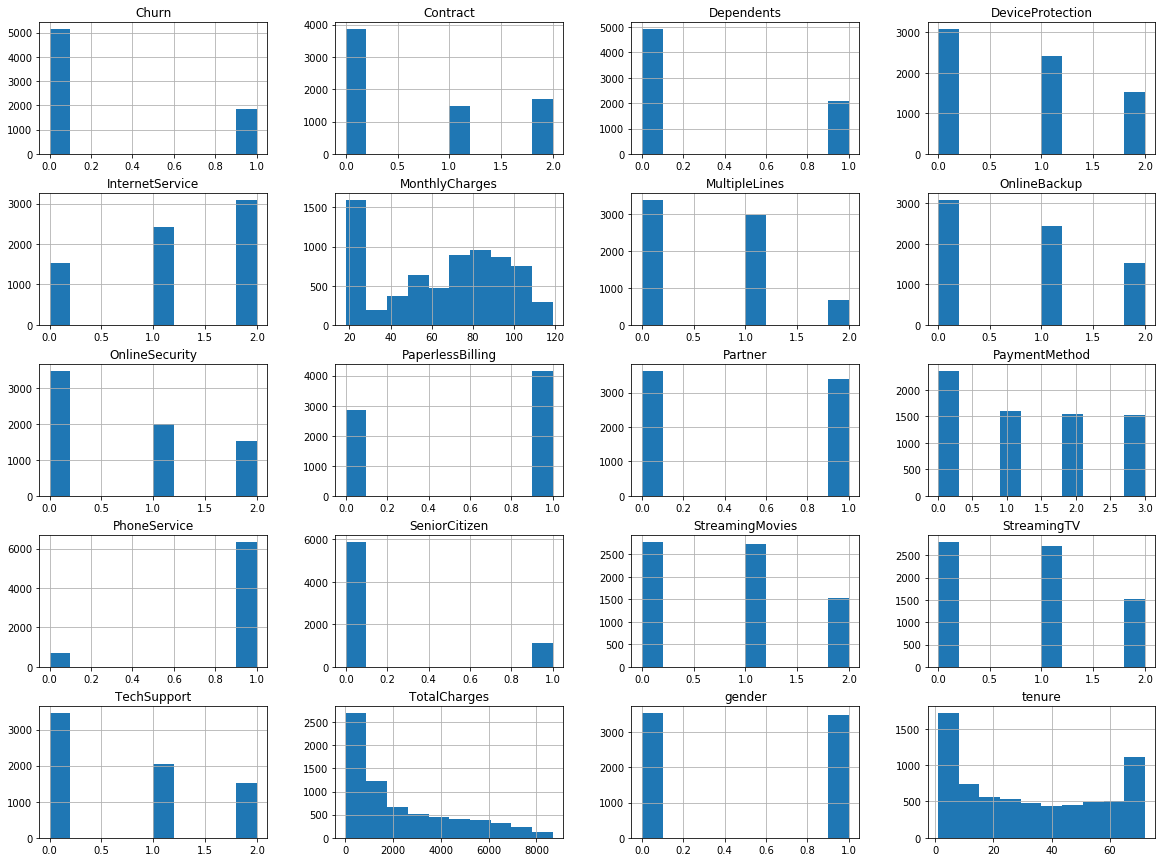

In [9]:
data.hist(figsize=(20,15));

In [10]:
len(data[data['OnlineBackup'] == 2])

1520

For most of the above graphs with just two columns - 0 represents no, 1 represents yes.

Quick takeaways:
- Churn is about 26% of the sample
- Contract is about a 8:3:3 for month to month:1 year: 2 year
- 5:2 split on whether customer has dependents
- There are 1,520 cases of customers without Internet service - they show as 2 for [DeviceProtection, OnlineBackup, OnlineSecurity, StreamingTV, StreamingMovies, TechSupport] and as 0 for InternetService
- Even split of males/females, partner/no partner, paperless billing/paper bills, whether or not customers stream tv and movies, DSL vs Fiber internet options, multiple lines option.
- Most customers are not Senior Citizens
- A little less than 10% don't have phone service
- Approx 2:3 ratio (40%) of customers who subscribe to premium services if they have Internet service
- The tenure shows a relatively steady customer onboarding with a certain percent sticking around for periods longer than a year - shown by the plateaued tenure from months 20 - 65. Seems like many leave after a year, but those who stay do so for a long time. Avg tenure is ~2.75 years.
- Monthly Charges shows a spike in the low range - there are about 1500 in that range, which would suggest those are the customers without Internet packages) - and then a relatively normal distribution of the remaining charges, suggesting different packages and service options.

Initial thoughts/speculations/guesses:
- Most senior citizens have phone but not internet service.
- Additional services are mostly held by customers without dependents and with a partner (DINKs - dual income no kids) so disposable income.

In [11]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.615330,1.224118,0.718857,0.777162,0.776166,0.722412,0.816695,0.820677,0.688567,0.592719,1.315557,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.655867,0.778643,0.796556,0.778188,0.778542,0.795571,0.762952,0.761287,0.832934,0.491363,1.149523,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Testing for push